
## For checking the HDF5 files

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


## Accessing the contents of the file

The file is located in '../data/galaxy_data.hdf5'. 

It contains the following structure:
 
 * redshift (e.g. '0.0')
   * quantity (e.g. 'FRB_RM') 
     * 'data'
     * 'bins'
     
Each `quantity` group have attributes containing a description and units. The `data` dataset has the PDF values over 100 bins.

### Plotting the contents

To exemplify and test, here are some plots of the contents.

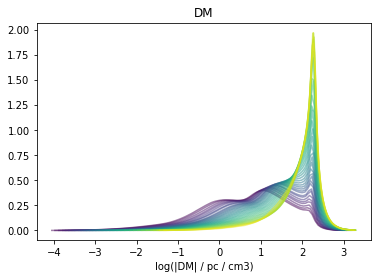

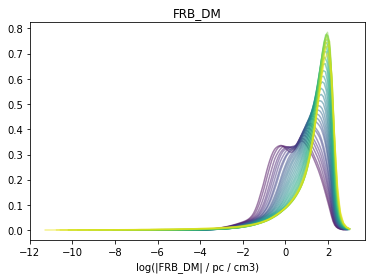

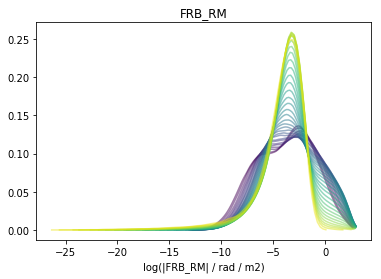

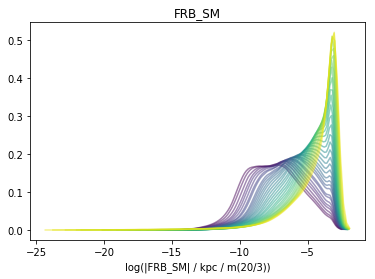

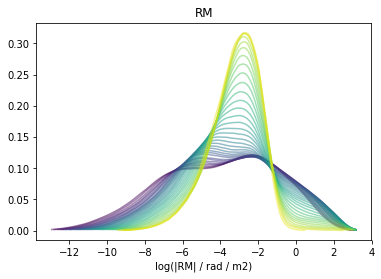

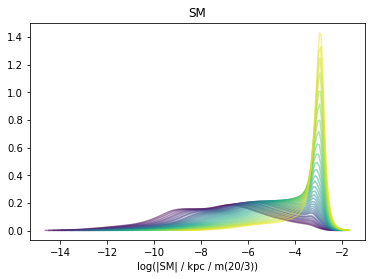

In [14]:
cmap = plt.cm.viridis

with h5py.File('../data/galaxy_data.hdf5','r') as f:
    zs = list(f.keys())
    
    for q in f[zs[0]].keys(): # Using redshift 0.00 as reference
        plt.figure()
        for i, z in enumerate(zs):
            
            c = cmap(i/len(zs))

            b, h = f[z][q]['bins'], f[z][q]['data']
            plt.plot(b,h, alpha=0.5, color=c)
            plt.title(q)
            unit = f[z][q].attrs['Unit']
            plt.xlabel('log(|{0}| / {1})'.format(q,unit))

In [10]:
with h5py.File('../data/galaxy_data.hdf5','r') as f:
    zs = list(f.keys())
    print(zs)
    for z in zs:
#        print( f[z].keys())
        print( f[z+'/number_density'].value*(1+float(z))**3 )
        #break

['0.00', '0.09', '0.21', '0.32', '0.41', '0.51', '0.62', '0.69', '0.83', '0.91', '0.99', '1.08', '1.17', '1.28', '1.39', '1.50', '1.63', '1.77', '1.91', '2.07', '2.24', '2.42', '2.62', '2.83', '3.06', '3.31', '3.58', '3.87', '4.18', '4.52', '4.89', '5.29', '5.72']
3.943964752772398
5.258555496213617
7.429877779285561
9.917053597586506
12.326838529286931
15.449212687786243
19.47974689567021
22.349666381780303
28.969892458035048
33.2649495092992
37.97222801523974
43.70458284193757
49.9283904393132
58.12351667847818
66.91056135264174
76.05286555756268
87.141682939578
98.93735531585855
109.88034641704444
122.0086062408705
134.199016876487
146.25123309669647
158.8892581151961
170.18392471464603
180.22813377768938
187.575299203156
190.51144775619886
187.64254103879563
177.05387483862373
159.33787622664346
135.8933666555979
105.53154639059653
66.41173432013075


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
